<a href="https://colab.research.google.com/github/Claudia-Cabrera/applications-of-machine-learning/blob/main/OrganicProducts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data & Check for Missing Data

In [ ]:
# import data and preview
df = pd.read_csv('/content/drive/MyDrive/BAN 6053/organics.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
# count of missing values
df.isnull().sum()

,0
ID,0
DemAffl,1085
DemAge,1508
DemCluster,674
DemClusterGroup,674
DemGender,2512
DemReg,465
DemTVReg,465
PromClass,0
PromSpend,0


## Handle Missing Data
- For missing Gender impute as Unknown (U)
- Remove all other observations w/ missing data bc dataset will stil be large

In [ ]:
# Fill in U for NA DemGender
df['DemGender'].fillna('U', inplace=True)
# drop missing values
df.dropna(inplace=True)

In [ ]:
# check
print(df.isnull().sum())
df.head()

ID                 0
DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
TargetAmt          0
dtype: int64


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18510 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               18510 non-null  int64  
 1   DemAffl          18510 non-null  float64
 2   DemAge           18510 non-null  float64
 3   DemCluster       18510 non-null  float64
 4   DemClusterGroup  18510 non-null  object 
 5   DemGender        18510 non-null  object 
 6   DemReg           18510 non-null  object 
 7   DemTVReg         18510 non-null  object 
 8   PromClass        18510 non-null  object 
 9   PromSpend        18510 non-null  float64
 10  PromTime         18510 non-null  float64
 11  TargetBuy        18510 non-null  int64  
 12  TargetAmt        18510 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.0+ MB


# Preprocess Data

In [ ]:
# Drop unnecessary variables (ID and TargetAmt)
df.drop(['ID', 'TargetAmt'], axis=1, inplace=True)

# convert TargetBuy from int to category
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0


# Split Data into training & test sets

In [ ]:
# split the data into training and testing sets
X = df.drop('TargetBuy', axis=1)
# get dummy variables
X = pd.get_dummies(X, columns=['DemCluster', 'DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass'], drop_first=True, dtype='float')
y = df['TargetBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 12957 entries, 6201 to 11725
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                12957 non-null  float64
 1   DemAge                 12957 non-null  float64
 2   PromSpend              12957 non-null  float64
 3   PromTime               12957 non-null  float64
 4   DemCluster_2.0         12957 non-null  float64
 5   DemCluster_3.0         12957 non-null  float64
 6   DemCluster_4.0         12957 non-null  float64
 7   DemCluster_5.0         12957 non-null  float64
 8   DemCluster_6.0         12957 non-null  float64
 9   DemCluster_7.0         12957 non-null  float64
 10  DemCluster_8.0         12957 non-null  float64
 11  DemCluster_9.0         12957 non-null  float64
 12  DemCluster_10.0        12957 non-null  float64
 13  DemCluster_11.0        12957 non-null  float64
 14  DemCluster_12.0        12957 non-null  float64
 15  DemC

# Decision Tree

In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.0001)

# fit the model to the training data
dt.fit(X_train, y_train)

# textual representation of the tree
#text_rep = tree.export_text(dt)
#print(text_rep)



DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=25, min_samples_leaf=10)

## Visualize Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")


'decision_tree_default.pdf'

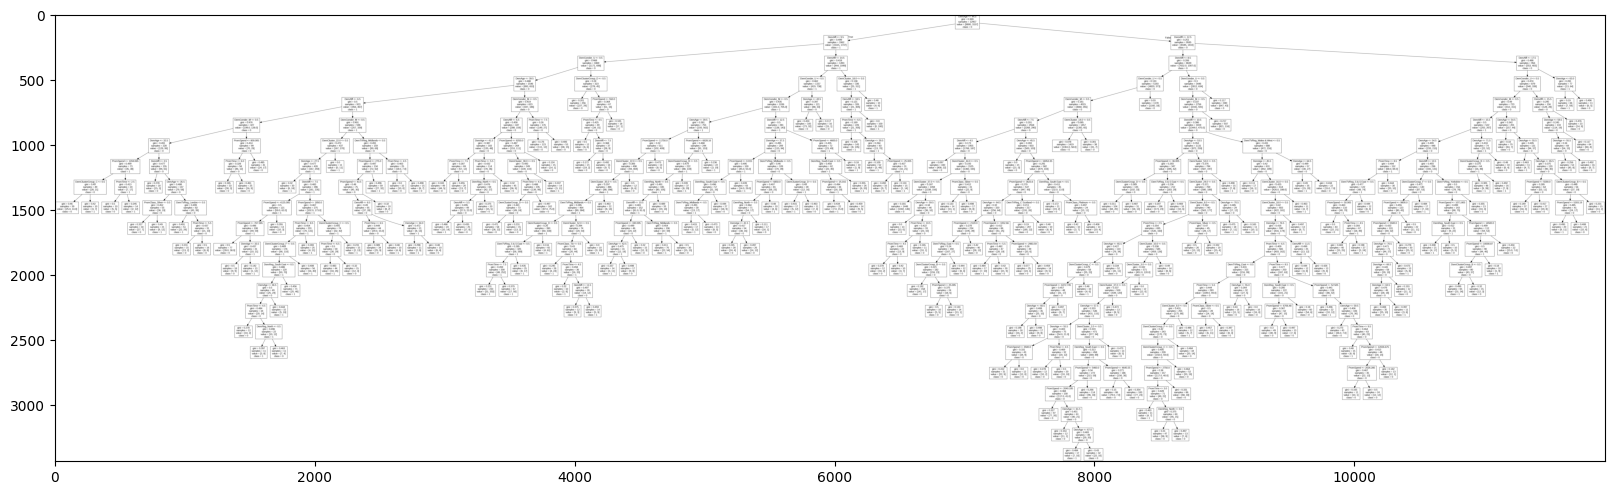

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

## Make predictions  

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

## Asses Model

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8434
Precision: 0.7545
Recall.  : 0.5296

 -- test set -- 
Accuracy : 0.8021
Precision: 0.6291
Recall.  : 0.4575


## Confusion Matrix

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[9256 1485]
 [ 544 1672]]
[[3835  734]
 [ 365  619]]


## Generate ROC Curves

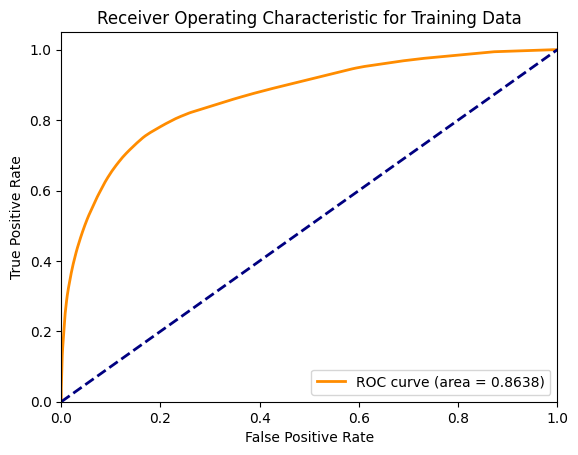

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

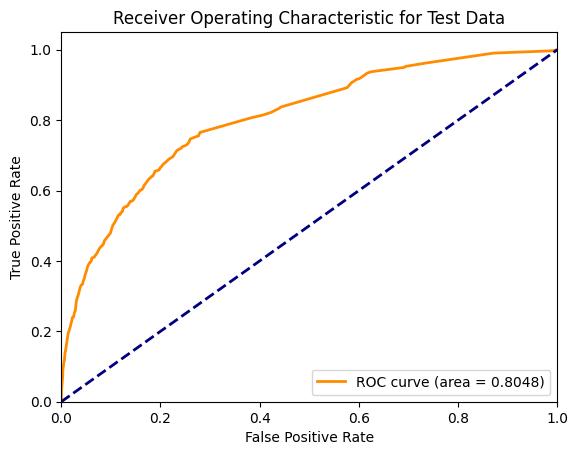

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


## Feature Importance

    importance            feature
1     0.442539             DemAge
0     0.287365            DemAffl
65    0.070720        DemGender_U
64    0.054639        DemGender_M
2     0.046368          PromSpend
..         ...                ...
69    0.000000  DemReg_South West
75    0.000000    DemTVReg_N Scot
74    0.000000    DemTVReg_N East
78    0.000000    DemTVReg_S West
76    0.000000    DemTVReg_N West

[84 rows x 2 columns]


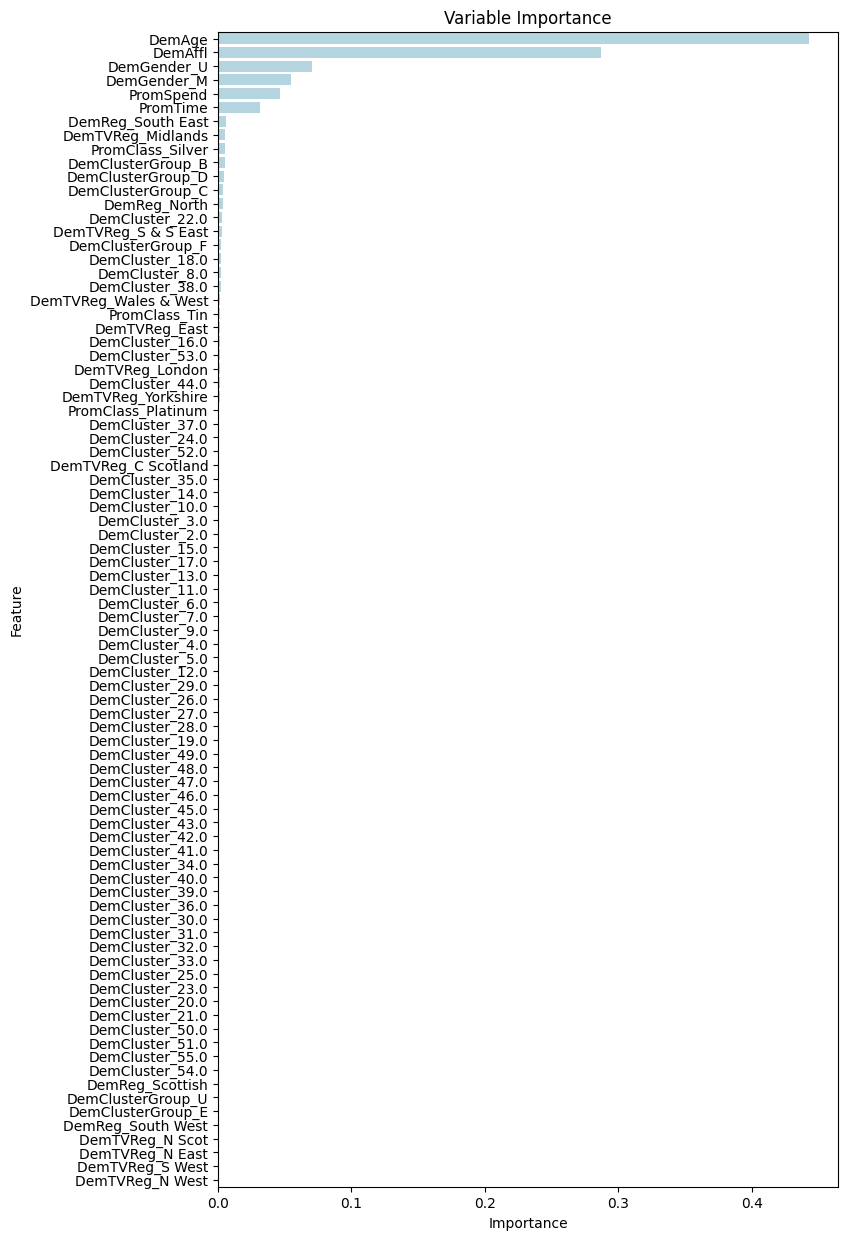

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(8,15))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

## Tune parameters

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 50}
DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=50)


In [ ]:
dt_tune = DecisionTreeClassifier(max_depth = None, min_samples_leaf=50, ccp_alpha = 0)

# fit the model to the training data
dt_tune.fit(X_train, y_train)

# make predictions on the training and test data
y_pred_train = dt_tune.predict(X_train)
y_pred_test = dt_tune.predict(X_test)

y_prob_train = dt_tune.predict_proba(X_train)
y_prob_test = dt_tune.predict_proba(X_test)

# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8274
Precision: 0.7209
Recall.  : 0.4755

 -- test set -- 
Accuracy : 0.8194
Precision: 0.6854
Recall.  : 0.4782


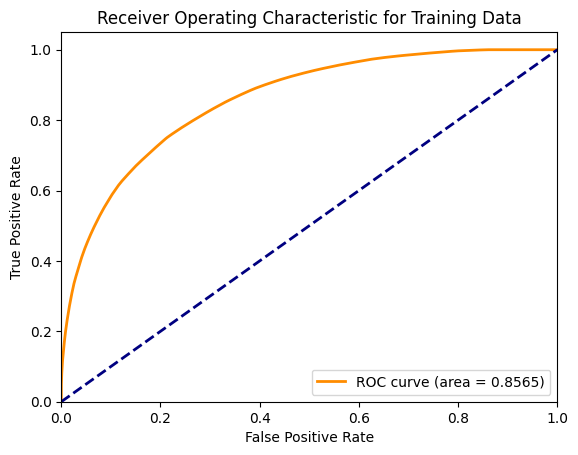

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

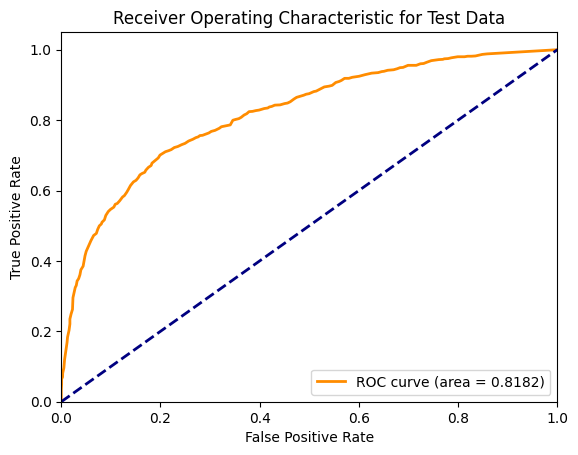

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=904)

# fit the model to the training data
rf.fit(X_train, y_train)

# create an instance of a random forest classifier using default values and overfitting controls

rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=5, min_samples_leaf=100, random_state=904)

# fit the model to the training data
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=100, random_state=904)

## Make predictions

In [ ]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

## Assess Model

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7754
Precision: 0.9215
Recall.  : 0.0855

 -- test set -- 
Accuracy : 0.7751
Precision: 0.9062
Recall.  : 0.0857


## ROC curves

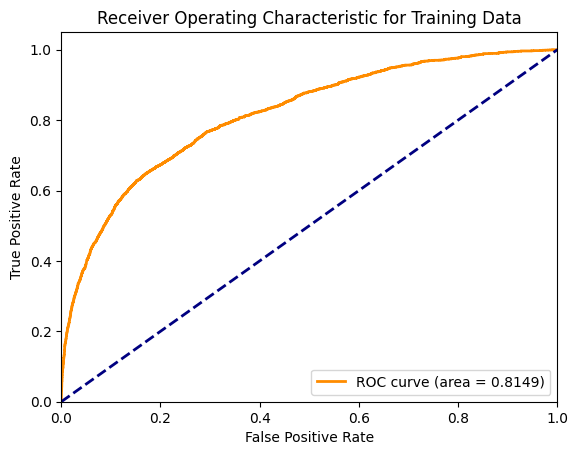

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

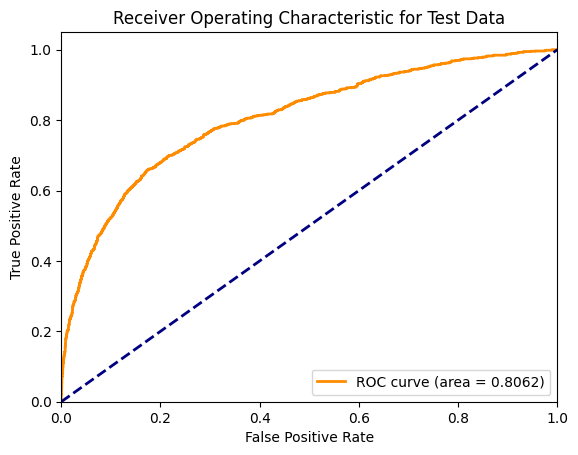

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


## Feature Importance

    importance            feature
1     0.407281             DemAge
0     0.299329            DemAffl
65    0.097803        DemGender_U
2     0.049742          PromSpend
64    0.047450        DemGender_M
..         ...                ...
22    0.000000    DemCluster_20.0
63    0.000000  DemClusterGroup_U
56    0.000000    DemCluster_54.0
57    0.000000    DemCluster_55.0
75    0.000000    DemTVReg_N Scot

[84 rows x 2 columns]


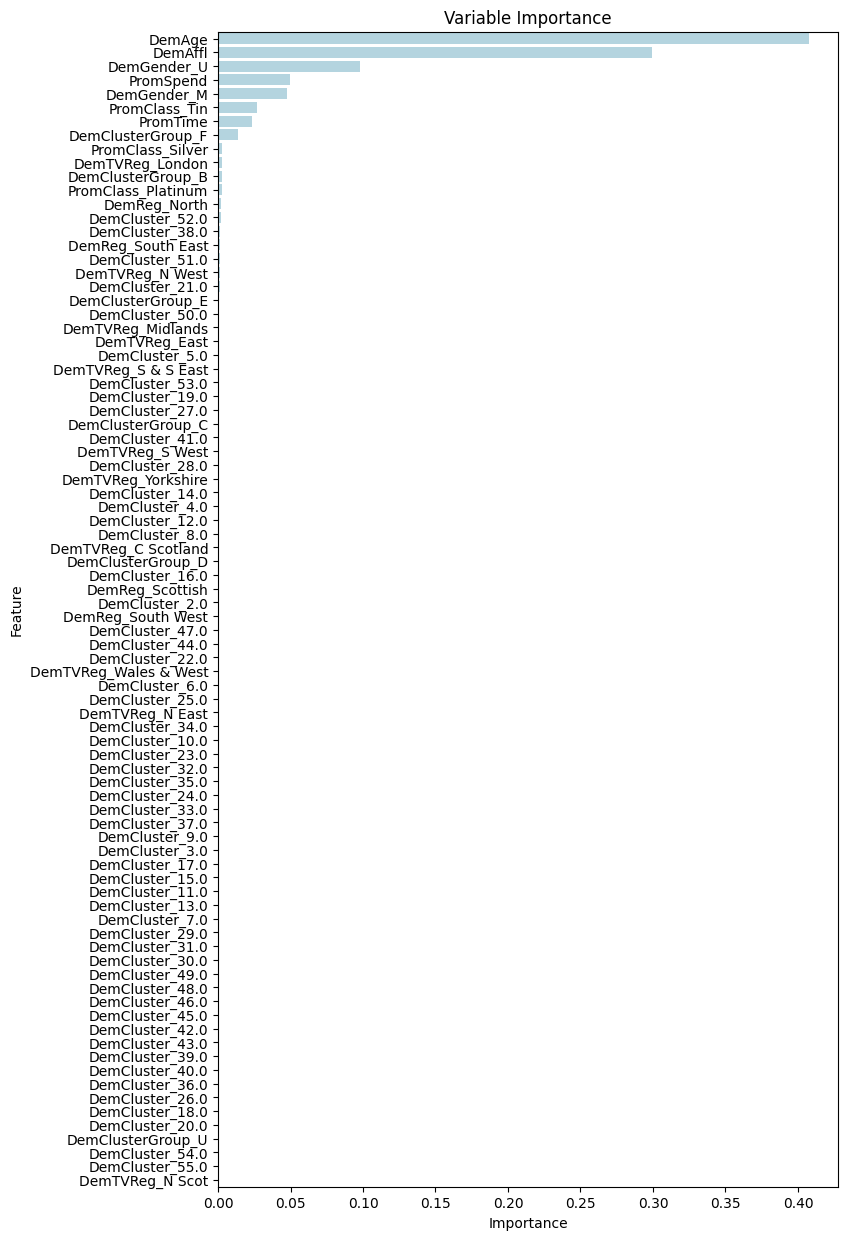

In [ ]:
#calculate feature importance
rf_imp = rf.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = rf_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(8,15))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

## Tune Parameters

In [ ]:
rf_tune = RandomForestClassifier()

param_grid = {
    'n_estimators':[10, 50, 150, 500],
    'max_features':['sqrt', 2, 4, 6],
    'max_depth': [None, 5],
    'min_samples_leaf': [1, 100],
}

grid_search = GridSearchCV(rf_tune, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
RandomForestClassifier(n_estimators=500)


In [ ]:
rf_tune = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, n_estimators= 500)
# fit the model to the training data
rf_tune.fit(X_train, y_train)
# make predictions on the training and test data
y_pred_train_rf = rf_tune.predict(X_train)
y_pred_test_rf = rf_tune.predict(X_test)

y_prob_train_rf = rf_tune.predict_proba(X_train)
y_prob_test_rf = rf_tune.predict_proba(X_test)

# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9995
Precision: 0.9990
Recall.  : 0.9990

 -- test set -- 
Accuracy : 0.8190
Precision: 0.7117
Recall.  : 0.4324


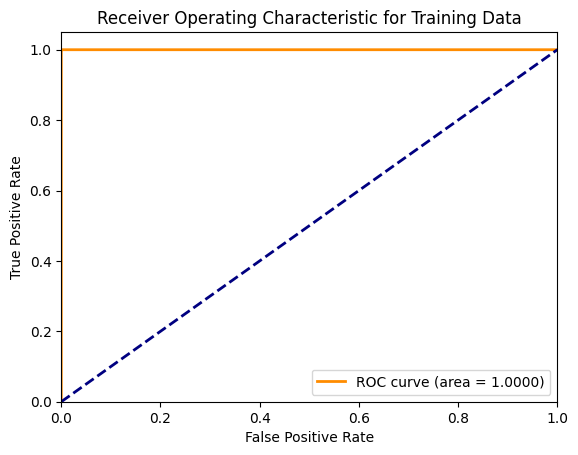

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

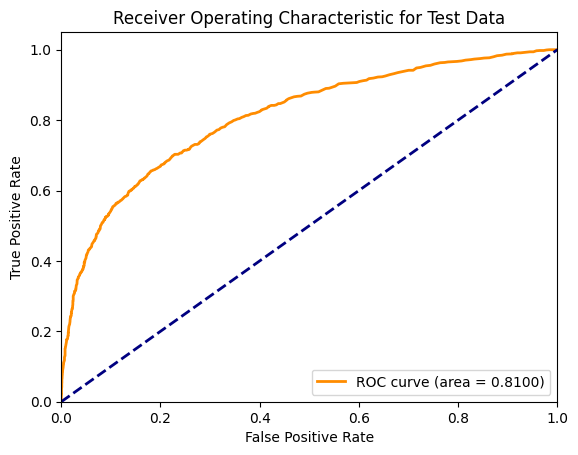

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting

In [ ]:

# create an instance of the Gradient Boosting Classifier using default values

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=3, random_state=904)


# fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=904)

In [ ]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8289
Precision: 0.7205
Recall.  : 0.4865

 -- test set -- 
Accuracy : 0.8210
Precision: 0.6887
Recall.  : 0.4841


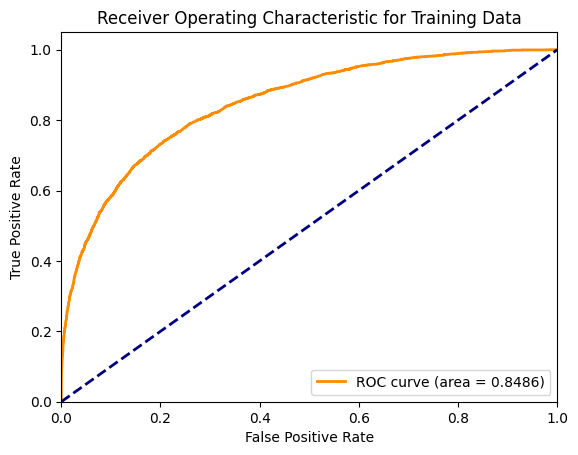

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_gb[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

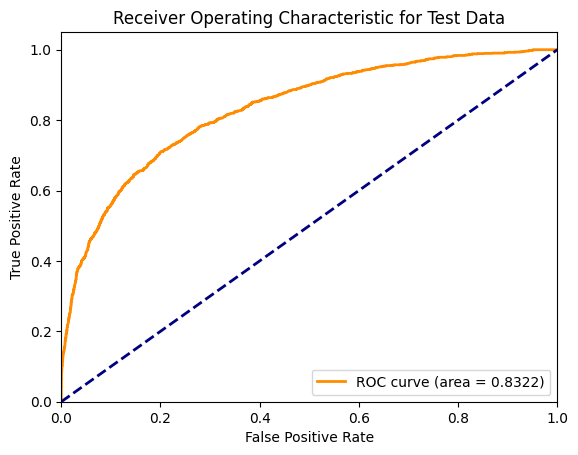

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_gb[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


    importance              feature
1     0.484824               DemAge
0     0.332060              DemAffl
65    0.097914          DemGender_U
64    0.050552          DemGender_M
2     0.007650            PromSpend
..         ...                  ...
57    0.000000      DemCluster_55.0
70    0.000000  DemTVReg_C Scotland
78    0.000000      DemTVReg_S West
81    0.000000   PromClass_Platinum
83    0.000000        PromClass_Tin

[84 rows x 2 columns]


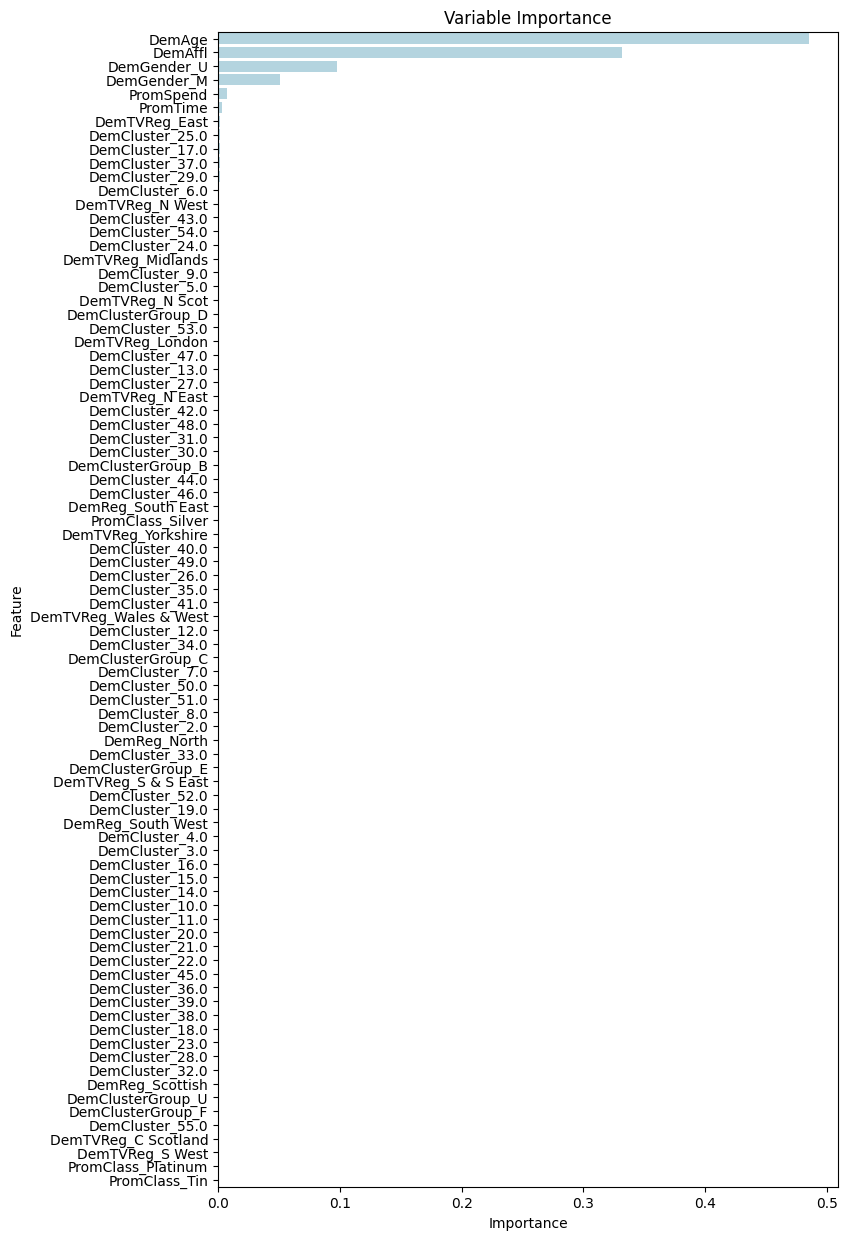

In [ ]:
#calculate feature importance
gb_imp = gb.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = gb_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(8,15))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

        feature  importance
1        DemAge    0.484824
0       DemAffl    0.332060
65  DemGender_U    0.097914
64  DemGender_M    0.050552


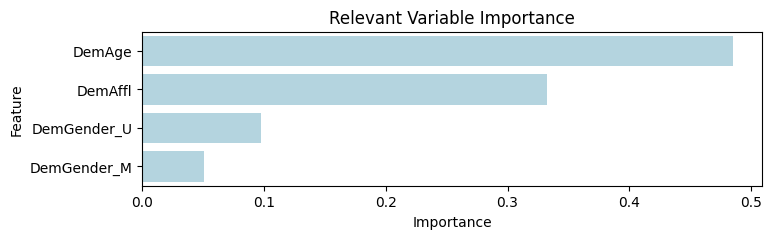

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate feature importance
gb_imp = gb.feature_importances_

# Create a dataframe with feature names and their importances
df = pd.DataFrame({'feature': X.columns, 'importance': gb_imp})

# Sort data so features with the largest importance values are at the top
df_sorted = df.sort_values(by='importance', ascending=False)

# Define a threshold for relevant features (e.g., importance > 0.01)
threshold = 0.05
relevant_features = df_sorted[df_sorted['importance'] > threshold]

print(relevant_features)

# Create variable importance plot for relevant features
plt.figure(figsize=(8, len(relevant_features) * 0.5))  # Adjust height dynamically
plt.title('Relevant Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=relevant_features,
            y='feature',
            x='importance',
            color="lightblue")
plt.show()

# Visualizations for SlideDeck

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BAN 6053/organics.csv')

# convert TargetBuy from int to category
df['TargetBuy'] = df['TargetBuy'].astype('category')

# get count of TargetBuy
df['TargetBuy'].value_counts()

,count
TargetBuy,
0,16718
1,5505


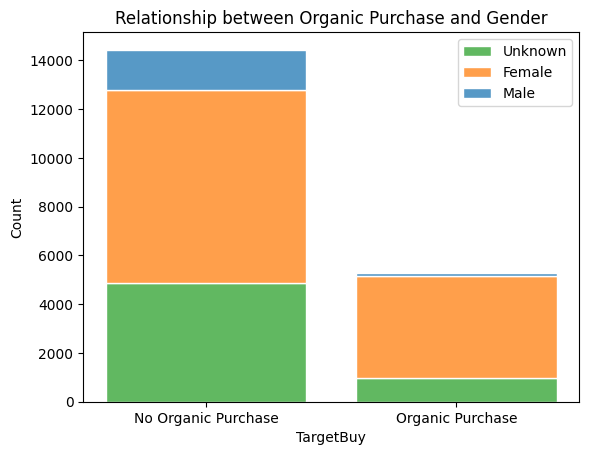

In [ ]:
# Explore the relationship between Organic Purchase and Gender
sns.histplot(data=df, x='TargetBuy', hue='DemGender', multiple='stack', edgecolor='white', shrink = 0.8)
# change hue lables
plt.legend(labels=['Unknown', 'Female', 'Male'])
# Change x axis to have No Organic Purchase and Organic Purchase
plt.xticks([0, 1], ['No Organic Purchase', 'Organic Purchase'])
# Add Title
plt.title('Relationship between Organic Purchase and Gender')
plt.show()




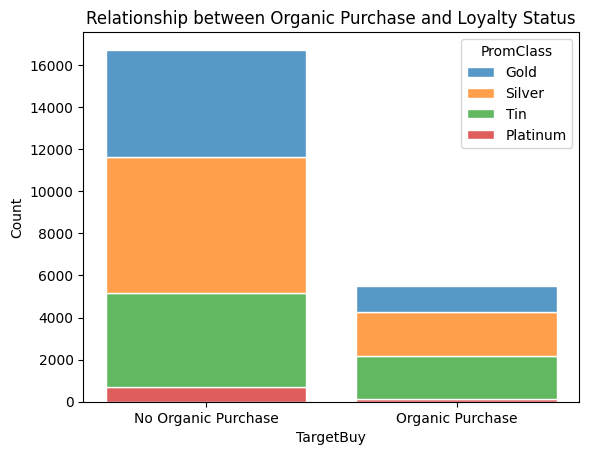

In [ ]:
# Explore the relationship between Organic Purchase and Loyalty Status
sns.histplot(data=df, x='TargetBuy', hue='PromClass', multiple='stack', edgecolor='white', shrink = 0.8)
# change hue lables
# Change x axis to have No Organic Purchase and Organic Purchase
plt.xticks([0, 1], ['No Organic Purchase', 'Organic Purchase'])
# Add Title
plt.title('Relationship between Organic Purchase and Loyalty Status')
plt.show()



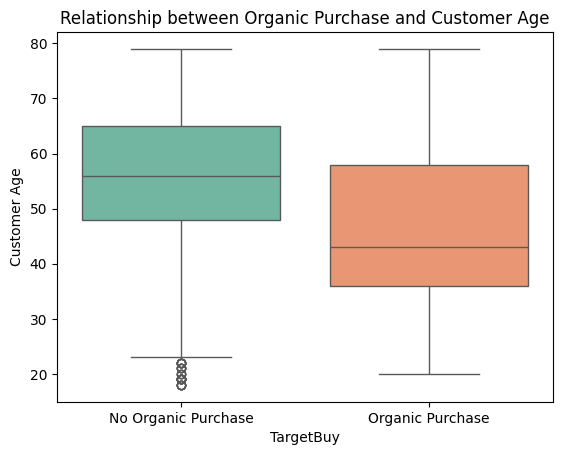

In [ ]:
# Explore the relationship between age and Organic Purchase
sns.boxplot(data=df, x='TargetBuy', y='DemAge', palette='Set2')
# Add Title
plt.title('Relationship between Organic Purchase and Customer Age')
plt.xticks([0, 1], ['No Organic Purchase', 'Organic Purchase'])
# change y axis label
plt.ylabel('Customer Age')
plt.show()

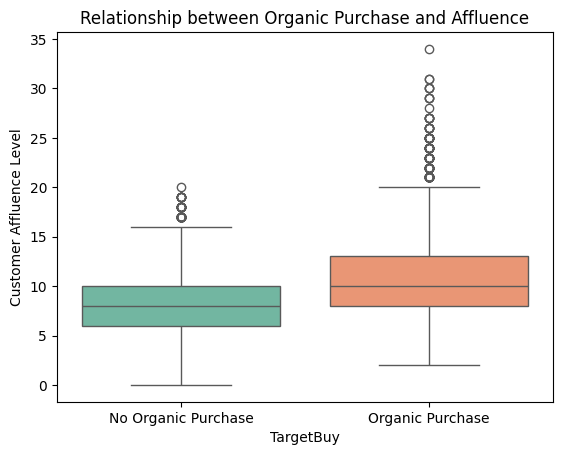

In [ ]:
# Explore the relationship between age and Organic Purchase
sns.boxplot(data=df, x='TargetBuy', y='DemAffl', palette='Set2')
# Add Title
plt.title('Relationship between Organic Purchase and Affluence')
plt.xticks([0, 1], ['No Organic Purchase', 'Organic Purchase'])
# change y axis label
plt.ylabel('Customer Affluence Level')
plt.show()